<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/ejemploclase_mar3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo básico aprendizaje estadístico

## Regresión por mínimos cuadrados sobre ruido blanco Gaussiano

$$x = x^* + \eta$$

$$ \eta \sim \mathcal{N}(\eta | \mu_\eta, \sigma_\eta)$$


$$\mathcal{N}(\eta | \mu_\eta, \sigma_\eta) = \frac{1}{\sqrt{2\pi \sigma^2_\eta}}\exp\left(\frac{-\|\eta-\mu_\eta\|^2}{2\sigma^2_\eta}\right)$$

# Desde análisis de datos:

$$y = f(x) + \eta$$

$$ y - f(x) = \eta \sim \mathcal{N}(\eta | \mu_\eta, \sigma_\eta)$$

$$ y - f(x) = \eta \sim \mathcal{N}(y-f(x) | \mu_\eta, \sigma_\eta)$$

$$ = \frac{1}{\sqrt{2\pi \sigma^2_\eta}}\exp\left(\frac{-\|(y-f(x))-\mu_\eta\|^2}{2\sigma^2_\eta}\right)$$



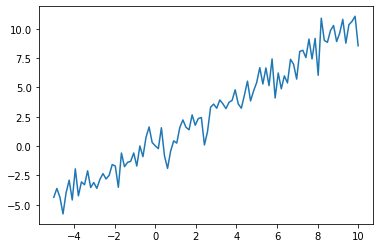

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xi = -5
xf = 10
N = 100 # instancias
x = np.linspace(xi,xf,N)
x = x.reshape(-1,1)
x.shape
eta = np.random.randn(N).reshape(-1,1)
y = x + eta

plt.plot(x,y)
plt.show()

$$y = (mx + b) + \eta$$

$$\eta  \sim \mathcal{N}(\eta| \mu_\eta = 0, \sigma^2_\eta)$$

In [60]:
var = 0.4
m = 0.8
b = -2
N = 500
eta =  np.sqrt(var)*np.random.randn(N).reshape(-1,1) # mu + sqrt(var)*eta

In [61]:
print(eta.mean(),eta.var())

0.008651681940979304 0.44135985360663615


In [62]:
np.ones((N,1)).shape

(500, 1)

In [63]:
np.linspace(xi,xf,N)[np.newaxis].shape

(1, 500)

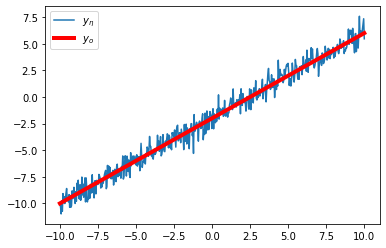

In [64]:
xi = -10
xf = 10
X = np.c_[np.linspace(xi,xf,N).reshape(-1,1),np.ones((N))]# np.c_ concatena por columnas dos vectores
X.shape
w = np.array([m,b]).reshape(-1,1) # parametros del modelo lineal m y b como vector columna 2 x 1
y = X.dot(w) + eta# X @ w
yo = X.dot(w)
plt.plot(X[:,0],y,label = '$y_{\eta}$') #  graficar x vs  salida con ruido
plt.plot(X[:,0],yo,'r',linewidth = 4,label = '$y_{o}$')
plt.legend()
plt.show()

In [65]:
we = np.linalg.pinv(X).dot(y) # estimacion por min cuadrados de w con pinv -> fit ajuste
print(we,m,b)

[[ 0.80595788]
 [-1.99134832]] 0.8 -2


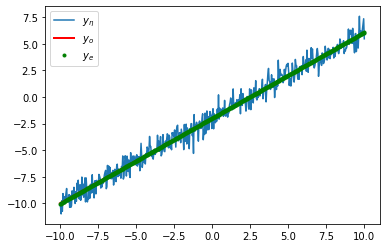

In [66]:
ye = X.dot(we)# prediccion
plt.plot(X[:,0],y,label = '$y_{\eta}$') #  graficar x vs  salida con ruido
plt.plot(X[:,0],yo,'r',linewidth = 2,label = '$y_{o}$')
plt.plot(X[:,0],ye,'g.',linewidth = 2,label = '$y_{e}$')
plt.legend()
plt.show()

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()  # llamo init, constructor del objeto sklearn Linear Regression
reg.fit(X,y) # ajustar, entrenar el modelo -> pinv(X).dot(y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print(reg.coef_,reg.intercept_)

[[0.80595788 0.        ]] [-1.99134832]


In [69]:
ye = reg.predict(X) # predicir valores  nuevos, X.dot(we)

In [70]:
yen = reg.predict(X[2].reshape(1,-1))
yen

array([[-9.98632131]])

In [71]:
print(mean_squared_error(yo,ye))

0.0012628064099442452
